Please read the readme.md about the project.

In [2]:
import readFastaperso as rF
import search_one_word as sow
proteome=rF.readFastaFile2("human-proteome.fasta")
proteomefull=rF.readFastaFile1("human-proteome.fasta")

Here the goal is to do the same thing as in ICEgenome3 but on not concatenated proteins, in order to remove the words that straddle two proteins.

In [6]:
def search_proteome(searched_word,proteome,dictionnary):
    foundinprot=0
    for prot in proteome: #for each protein
        foundinprot+=sow.search_one_word(searched_word,prot,dictionnary,warning=False)
        #we count the number of time the word is present and add it to the sum of previous proteins
    return(foundinprot)



In [8]:
dictionnary=sow.create_dico("english-words.txt")
search_proteome("eye",proteome,dictionnary)

1355

we need a word that straddle two proteins to check wether it work

In [5]:
proteome

['MTGYTPDEKLRLQQLRELRRRWLKDQELSPREPVLPPQKMGPMEKFWNKFLENKSPWRKMVHGVYKKSIFVFTHVLVPVWIIHYYMKYHVSEKPYGIVEKKSRIFPGDTILETGEVIPPMKEFPDQHH',
 'MVNLLQIVRDHWVHVLVPMGFVIGCYLDRKSDERLTAFRNKSMLFKRELQPSEEVTWK',
 'MDEVEQDQHEARLKELFDSFDTTGTGSLGQEELTDLCHMLSLEEVAPVLQQTLLQDNLLGRVHFDQFKEALILILSRTLSNEEHFQEPDCSLEAQPKYVRGGKRYGRRSLPEFQESVEEFPEVTVIEPLDEEARPSHIPAGDCSEHWKTQRSEEYEAEGQLRFWNPDDLNASQSGSSPPQDWIEEKLQEVCEDLGITRDGHLNRKKLVSICEQYGLQNVDGEMLEEVFHNLDPDGTMSVEDFFYGLFKNGKSLTPSASTPYRQLKRHLSMQSFDESGRRTTTSSAMTSTIGFRVFSCLDDGMGHASVERILDTWQEEGIENSQEILKALDFSLDGNINLTELTLALENELLVTKNSIHQAALASFKAEIRHLLERVDQVVREKEKLRSDLDKAEKLKSLMASEVDDHHAAIERRNEYNLRKLDEEYKERIAALKNELRKEREQILQQAGKQRLELEQEIEKAKTEENYIRDRLALSLKENSRLENELLENAEKLAEYENLTNKLQRNLENVLAEKFGDLDPSSAEFFLQEERLTQMRNEYERQCRVLQDQVDELQSELEEYRAQGRVLRLPLKNSPSEEVEANSGGIEPEHGLGSEECNPLNMSIEAELVIEQMKEQHHRDICCLRLELEDKVRHYEKQLDETVVSCKKAQENMKQRHENETHTLEKQISDLKNEIAELQGQAAVLKEAHHEATCRHEEEKKQLQVKLEEEKTHLQEKLRLQHEMELKARLTQAQASFEREREGLQSSAWTEEKVRGLTQELEQFHQEQLTSLVEKHTLEKEELRKELLEKHQRELQEGREK

lets try the word "HHMV"

First we test in the concatenated proteome

In [9]:
sow.search_one_word("hhmv",proteomefull,dictionnary)

This word is not in the dictionnary, but we will try to find it in the proteome anyway


14

Then in the differenciated proteome

In [10]:
search_proteome("hhmv",proteome,dictionnary)

11

It works !!!

Now we will search for each word of the dictionnary.
As the next command takes a lot of time, I wrote the result in "foundvector.txt", then used this file to get the result without having to run the code another time.

In [44]:
#vec_found=[]
#for i in dictionnary:
#    vec_found.append(search_proteome(i,proteome,dictionnary))
#f= open("foundvector.txt","w+")
#for i in vec_found:
#    f.write('%d\n' %i)
#f.close() 



Lets open the file and transform the result in a list of integers
First  i use a slightly modified version of the dictionnary creation code

In [68]:
list_found=open("foundvector.txt").read()
list_num=[[]] #the dictionnary
number_position=0
for i in range(0,len(list_found)): #we go through list_found
    if list_found[i]=="\n": #if it contains \n 
        number_position+=1  #we move to the next position in the list
        list_num.append([])#and start a new number in the next position
    else: #if no \n
        list_num[number_position].append(list_found[i])


Then transform the list of list of strings into a list of integers.

In [108]:
int_list_temp=[]
int_list=[]
for i in list_num:
    int_list_temp.append("".join(i)) # to get a list of strings
int_list_temp=int_list_temp[:-1] #we need to remove last one that is empty
for i in int_list_temp:
    int_list.append(int(i)) #to transform into integers
int_list

Now we have two list of the same length 
1st The dictionnary with the words in it.
2nd The number of time the corresponding word is in the proteome.



If we want to plot the number of time a word in present in the proteome as a function of its length :
We need to get the vector with the length of each word of the dictionnary

In [114]:
length_word=[]
for i in dictionnary:
    length_word.append(len(i))
length_word


16

We also need the mean of the number of times word of length X will be found in the proteome

In [146]:
import numpy as np
len_mean_found=[]#will contain the mean of the number of times i lengthed words have been found.
for i in range(1,max(length_word)):
    stocki=[]
    for j in range(0,len(length_word)):
        if length_word[j]==i:
            stocki.append(int_list[j])
    if not stocki:
        stocki.append(0)
    len_mean_found.append(np.mean(stocki))
len_mean_found        

[645519.0,
 14404.35294117647,
 989.1206896551724,
 67.31075697211155,
 3.3354037267080745,
 0.1710794297352342,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

We can do some plotting

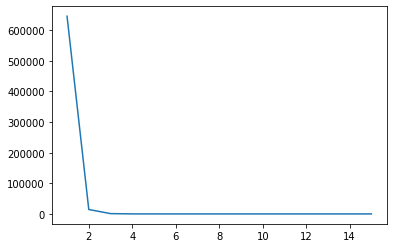

In [151]:
import matplotlib.pyplot as plt
plt.plot(range(1,16),len_mean_found)

Too see more clearly we can use only words of 3 letters or more

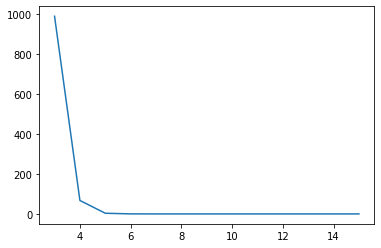

In [159]:
plt.plot(range(3,16),len_mean_found[2:])

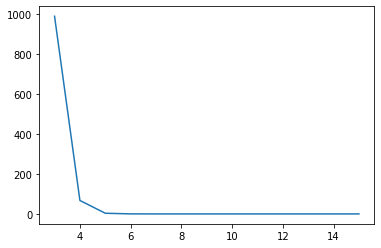

In [156]:
plt.plot(range(3,16),len_mean_found[2:])

It seems to follows a decreasing exponential curve.